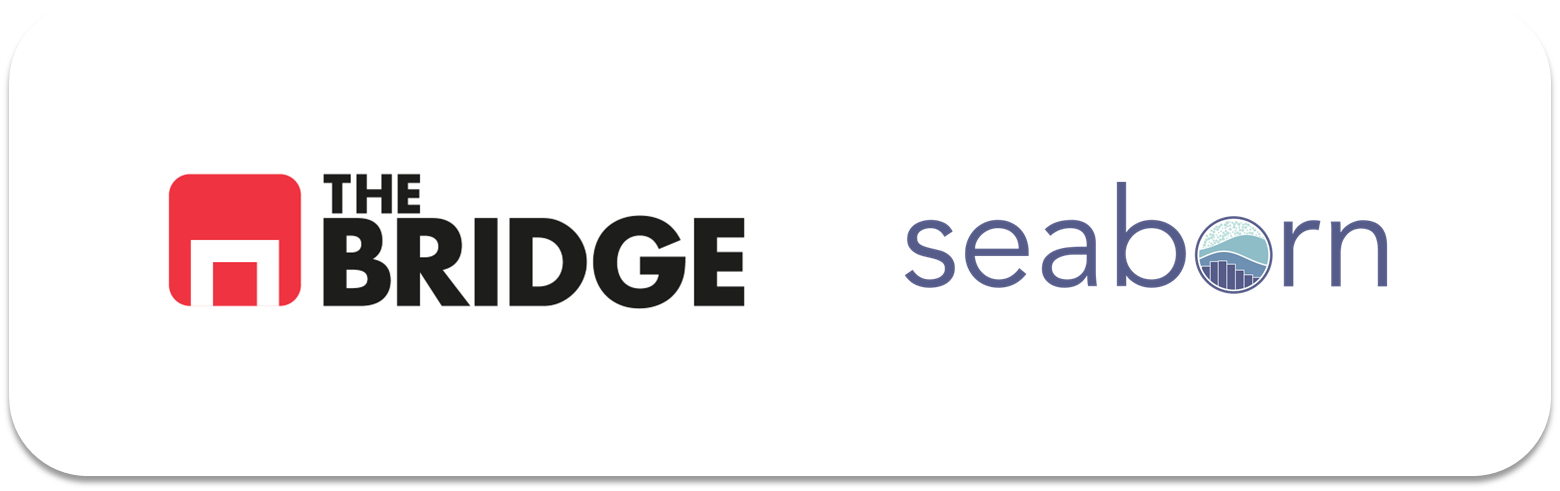

# Visualización Aplicada: Comparando Variables Categóricas

Nos enfocamos ahora ya en visualizar la relación entre dos variables, en concreto entre dos variables categóricas. Lancemos los preparativos:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

df_titanic = pd.read_csv("./data/titanic.csv")
df_vuelos = pd.read_csv("./data/dataset_viajes_jun23.csv")
df_seguros = pd.read_csv("./data/Marketing-Customer-Analysis.csv")


## Categóricas

### Gráficos y consideraciones

Vamos a ver:
* Comparativa de frecuencias por valores de una de las variables (con diagramas de barras y catplot)
* Tablas de contigencia (como mapas de calor)

* **Cuándo**: En análisis bivariantes los dos tipos son convenientes. En presentaciones las tablas de contigencia suelen ser demasiado "informativas" (Como todos los heatmaps si llevan números), pero son visualmente "atractivas" si se usan bien los colores. De usar tablas/mapas de calor quitar los numeros, remarcar la zona donde esté el dato importante que justifique nuestro mensaje.

* **Cuándo no**: En presentaciones, no usar tablas (casi) NUNCA (sí eso nunca, demasiados números y estás out), bueno savo que alguien te haya pedido que quiere ver los números de esa tabla o la tabla sea de dos por dos. Los mapas de calor sin números salvo en las casillas realmente relevantes.

* **Genérico**: Además si las variables tienen cardinalidades altas, en presentación aplica lo que ya dijimos crear categorías otros para poner allí las categorias no relevantes de una y otra variable (si es necesario no mostrarla)

### Catplot comparativa de frecuencias con Seaborn

Antes de empezar con las gráficas no está de más recordar como obtener las frecuencias de una variable (las de dos lo veremos en las tablas de contingencia):


In [2]:
# Obtener las freceuncias absolutas y relativas de la variable/columna "who" del dataset df_titanic

frecuencias_absolutas = df_titanic["who"].value_counts()
frecuencias_relativas = df_titanic["who"].value_counts(normalize = True) *  100

print(frecuencias_absolutas)
print(frecuencias_relativas)

who
man      537
woman    271
child     83
Name: count, dtype: int64
who
man      60.269360
woman    30.415264
child     9.315376
Name: proportion, dtype: float64


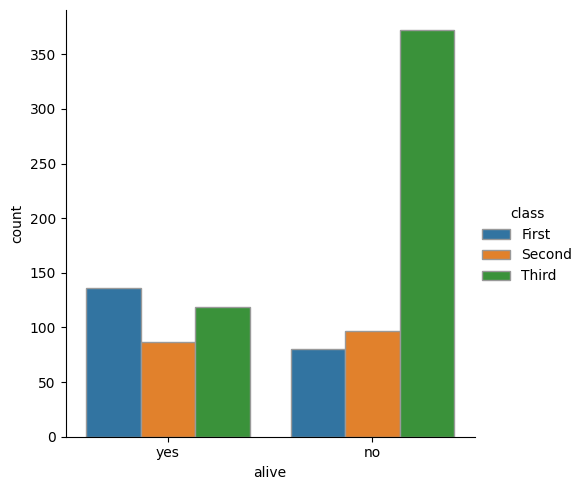

In [3]:
## Tablas de frecuencias absolutas modo 1
sns.catplot(x = "alive",
            hue = "class",
            kind = "count",   # Permite diferentes tipos de gráficos sobre variables
            edgecolor = ".6",
            orient = "V",
            data = df_titanic.sort_values('class'));


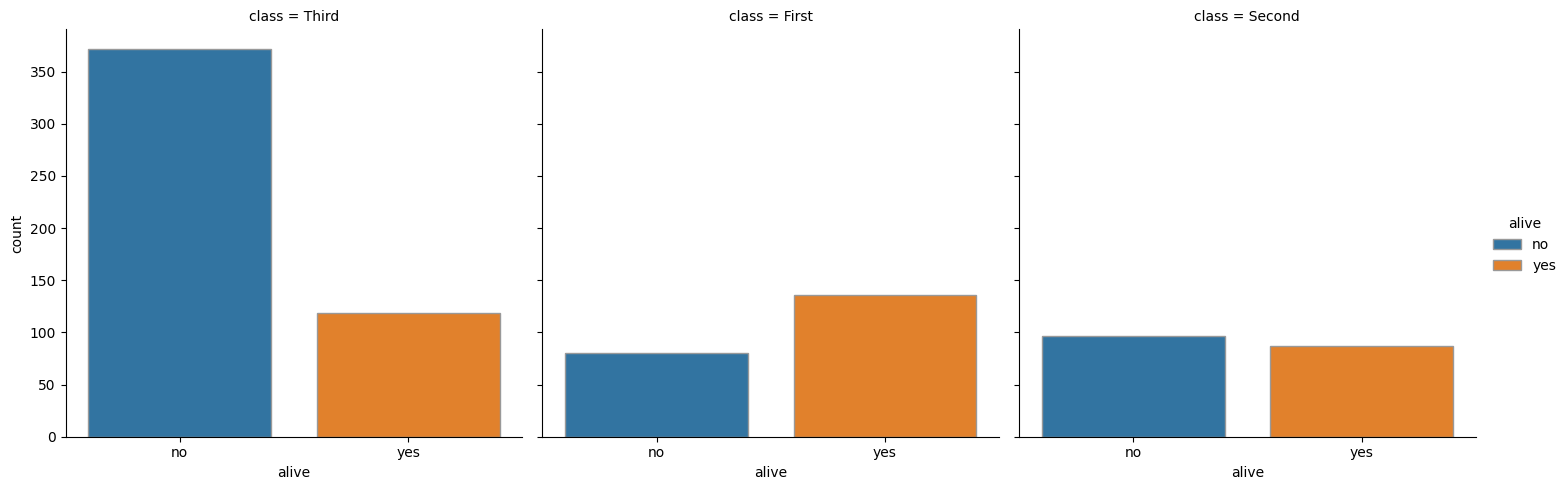

In [4]:
# Tabla de frecuencias modo 2
sns.catplot(x="alive",
            col = "class",  # Quiero una columna por cada uno de sus valores
            kind="count",
            edgecolor=".6",
            orient = "V",
            hue = "alive",
            legend= True,
            data=df_titanic);

Si queremos frecuencias relativas, primero tenemos que calcularlas y luego ya aplicamos una visualización:

In [5]:
# Primero calcular las frecuencias relativas
cat_colx = 'alive'
cat_coly = 'class'

frecuencias_absolutas = df_titanic.groupby(cat_coly, as_index = False)[cat_colx].value_counts()
frecuencias_relativas = df_titanic.groupby(cat_coly, as_index = False)[cat_colx].value_counts(normalize=True)

print(frecuencias_absolutas)
print(frecuencias_relativas)


    class alive  count
0   First   yes    136
1   First    no     80
2  Second    no     97
3  Second   yes     87
4   Third    no    372
5   Third   yes    119
    class alive  proportion
0   First   yes    0.629630
1   First    no    0.370370
2  Second    no    0.527174
3  Second   yes    0.472826
4   Third    no    0.757637
5   Third   yes    0.242363


In [6]:
frecuencias_relativas["proportion"] *= 100  # Uso el truco del operador acumulado

In [7]:
frecuencias_relativas

,class,alive,proportion
0,First,yes,62.962963
1,First,no,37.037037
2,Second,no,52.717391
3,Second,yes,47.282609
4,Third,no,75.763747
5,Third,yes,24.236253


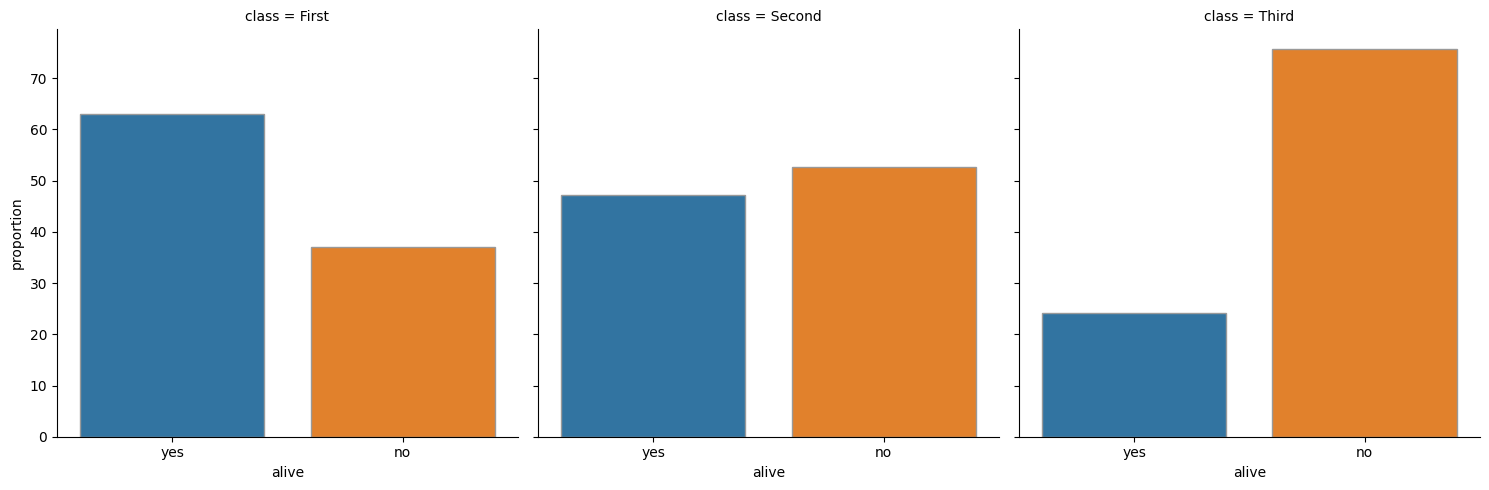

In [8]:
# Pintamos modo1
sns.catplot(x = "alive",
            y = "proportion",
            col="class",
            hue = "alive",
            kind = "bar", # Ojo, cambio el tipo de gráfico (ahora no "cuento" filas)
            edgecolor = ".6",
            data=frecuencias_relativas);


### Tablas de contingencia y Mapas de Calor

Otra forma numérica de ver las frecuencias de aparición conjunta de los valores de dos variables categóricas es recurrir a las tablas de contingencia:

In [9]:
tabla_contingencia = pd.crosstab(df_titanic['embark_town'],
                                 df_titanic['who'],
                                 margins = False)
tabla_contingencia


who,child,man,woman
embark_town,,,
Cherbourg,18,90,60
Queenstown,5,37,35
Southampton,60,410,174


Compárala con nuestra forma de obtener frecuencias absolutas:

In [10]:
cat_colx = "who"
cat_coly = "embark_town"
frecuencias_absolutas = df_titanic.groupby(cat_coly, as_index = False)[cat_colx].value_counts()
frecuencias_absolutas

,embark_town,who,count
0,Cherbourg,man,90
1,Cherbourg,woman,60
2,Cherbourg,child,18
3,Queenstown,man,37
4,Queenstown,woman,35
5,Queenstown,child,5
6,Southampton,man,410
7,Southampton,woman,174
8,Southampton,child,60


La primera puede que te resulte más útil a ti visualmente para analizar, la seguda es más manejable en términos de programación.

#### Mapa de calor de la tabla de contigencia:

Si queremos que la tabla de contingencia sea más "presentable", la convertimos en un mapa de calor:

<Axes: xlabel='who', ylabel='embark_town'>

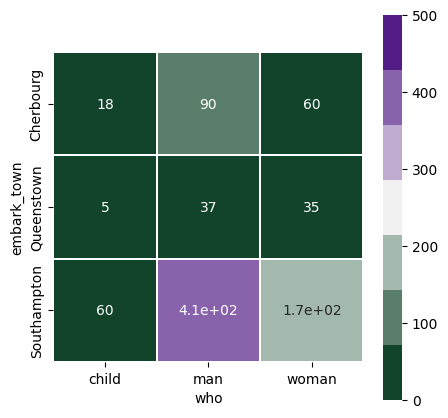

In [12]:
plt.figure(figsize = (5, 5))
sns.heatmap(tabla_contingencia,
            vmin = 0,
            vmax = 500,
            cmap = sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=0.1,
            annot=True)


Bastante visual,¿eh? Incluso más que las barras de frecuencia, si es lo que quiero mostrar... Pero es engorrosa... De usarla cómo lo haría yo:

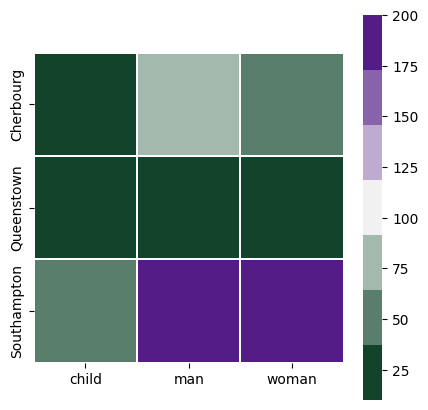

In [13]:
# Para Jaime hay demasiada información y quitaría info
plt.figure(figsize=(5,5))
sns.heatmap(tabla_contingencia,
            vmin = 10,
            vmax = 200,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square = True,
            linewidths=.1,
            annot=False);
plt.xlabel("")
plt.ylabel("");